In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [22]:
# Load data
filepath = "C:\\Users\\HP\\Desktop\\labs\\final\\cleaned_data_1.csv"
df = pd.read_csv(filepath)

In [23]:
# Select features for training
check_cols = ['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight']
x_train = df[check_cols]
x_train.head()

,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,weight
0,1000,0.03,6.20,6200.0,240.117626,358
1,31920,0.07,3.99,127360.8,240.117626,1855
2,38000,0.05,3.20,121600.0,240.117626,7590
3,416,0.02,5.35,2225.6,240.117626,504
4,135,0.36,32.40,4374.0,240.117626,328


In [32]:
# Convert to numeric and handle missing values
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_train = x_train.dropna()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Isolation Forest model training
clf = IsolationForest(n_jobs=15, random_state=42, contamination=0.20)
clf.fit(x_train_scaled)

# Predict anomalies
y_pred_train = clf.predict(x_train_scaled)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
# Analyze results
print(pd.value_counts(y_pred_train))
print(x_train.loc[y_pred_train == -1, :])

 1    3598
-1     898
Name: count, dtype: int64
      line_item_quantity  unit_price  pack_price  line_item_value  \
15                   500        0.68       82.19         41095.00   
27                  2597        0.79       23.67         61470.99   
66                 10240        0.34       41.10        420864.00   
71                 55356        0.23        6.98        386384.88   
72                     8        0.23       76.72           613.76   
...                  ...         ...         ...              ...   
7771               20440        0.17       20.48        418611.20   
7772               93700        0.14        8.26        773962.00   
7773              169447        0.06        3.75        635426.25   
7805               86008        0.14        8.11        697524.88   
7832               55300        0.33        9.76        539728.00   

      line_item_insurance   weight  
15                  65.75    117.0  
27                  98.35    117.0  
66          

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score
# Evaluate precision, recall, and F1 score (if you have true labels for anomalies)
true_labels = np.where(y_pred_train == -1, 1, 0)  # Use LOF predictions as true labels for simplicity
predicted_labels = np.where(y_pred_train == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score
precision = precision_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
recall = recall_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
f1 = f1_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[3598    0]
 [   0  898]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
classification_rep = classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly'])
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model
conf_matrix = confusion_matrix(np.ones(len(x_train)), y_pred_train)
classification_rep = classification_report(np.ones(len(x_train)), y_pred_train, target_names=['Normal', 'Anomaly'])

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[3598    0]
 [   0  898]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      3598
     Anomaly       1.00      1.00      1.00       898

    accuracy                           1.00      4496
   macro avg       1.00      1.00      1.00      4496
weighted avg       1.00      1.00      1.00      4496

Confusion Matrix:
[[   0    0]
 [ 898 3598]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
     Anomaly       1.00      0.80      0.89      4496

    accuracy                           0.80      4496
   macro avg       0.50      0.40      0.44      4496
weighted avg       1.00      0.80      0.89      4496



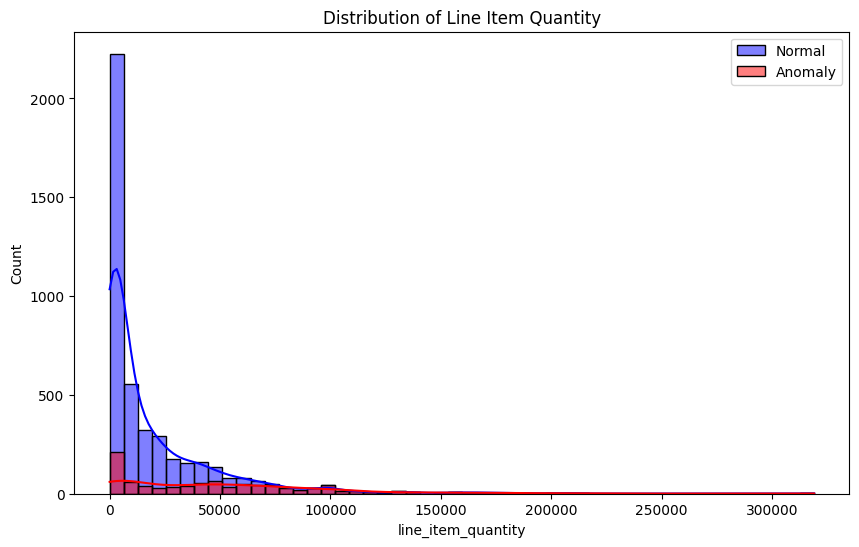

In [28]:
import seaborn as sns
# Example for line_item_quantity
plt.figure(figsize=(10, 6))
sns.histplot(x_train['line_item_quantity'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(x_train.loc[y_pred_train == -1, 'line_item_quantity'], bins=50, kde=True, color='red', label='Anomaly')
plt.title('Distribution of Line Item Quantity')
plt.legend()
plt.show()


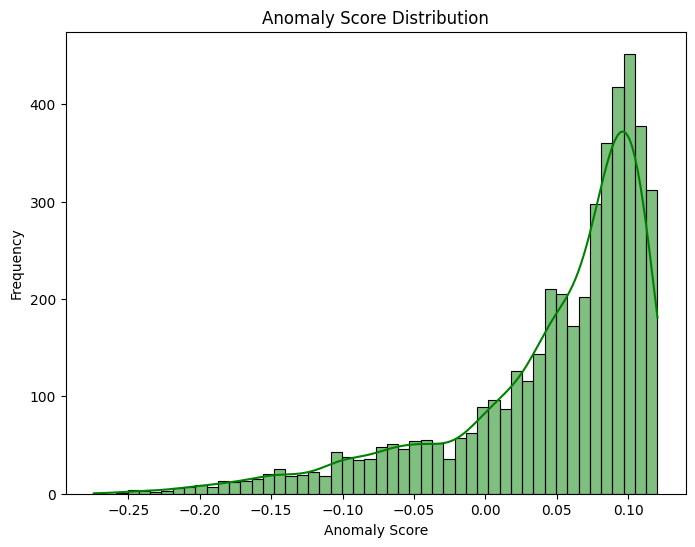

In [29]:
import seaborn as sns
# Anomaly score distribution
plt.figure(figsize=(8, 6))
sns.histplot(clf.decision_function(x_train_scaled), bins=50, kde=True, color='green')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

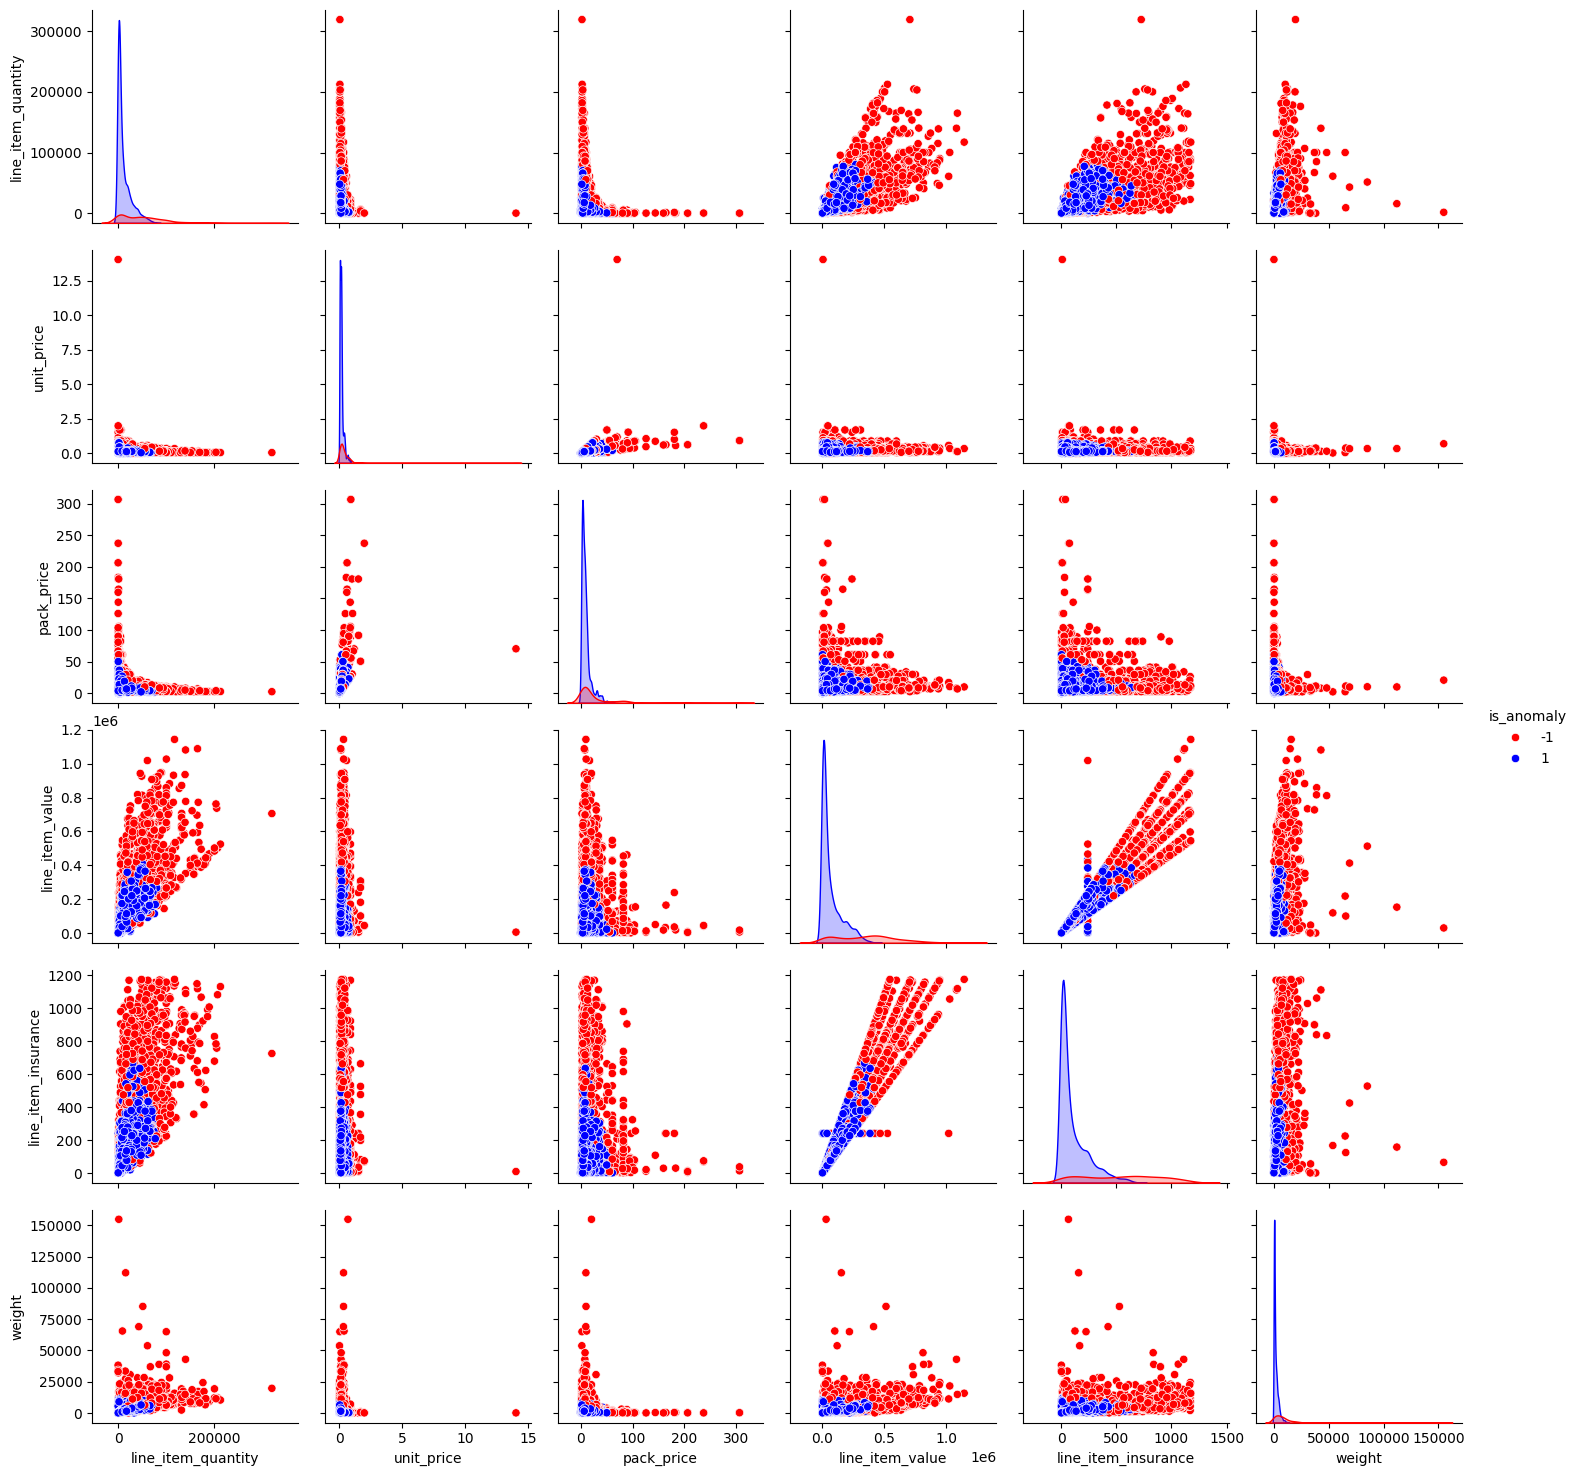

In [30]:
# Scatter plot matrix
df_visualization = x_train.copy()
df_visualization['is_anomaly'] = y_pred_train
sns.pairplot(df_visualization, hue='is_anomaly', diag_kind='kde', palette={-1: 'red', 1: 'blue'})
plt.show()
